# Ba 133

   Channel  Counts
0        0       9
1        1       0
2        2       2
3        3       0
4        4       0


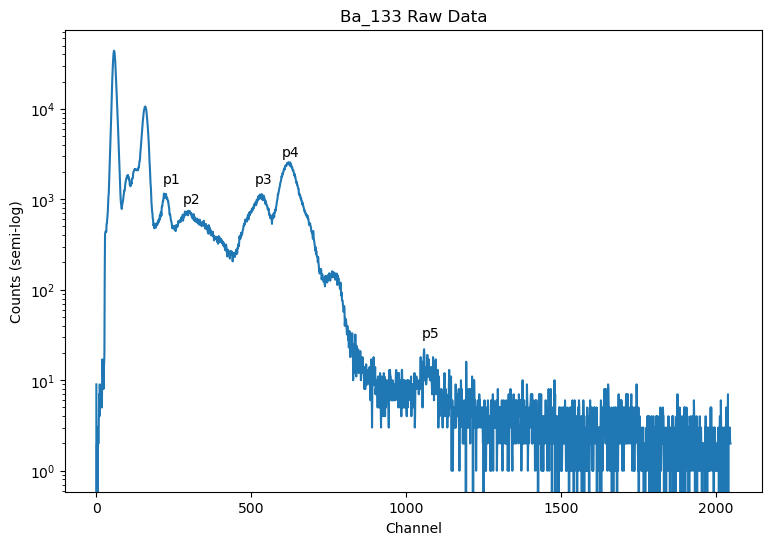

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#convert csv file to pd data frame (df), check first 10 values with df.head

Ba_133_df = pd.read_csv("Ba_133.csv")
print(Ba_133_df.head())

# label x and y df columns & make raw data plot
Ba_133_x = Ba_133_df["Channel"]
Ba_133_y = Ba_133_df["Counts"]

plt.figure(figsize=(9,6))
plt.xlabel("Channel")
plt.ylabel("Counts (semi-log)")
plt.title("Ba_133 Raw Data")

# use annotate to mark the peaks
plt.annotate( 'p1', xy=(215, 1000), xytext=(215, 1500),
            )
plt.annotate('p2', xy=(280, 800), xytext=(280, 900),
            )
plt.annotate('p3', xy=(510, 1000), xytext=(510, 1500),
            )
plt.annotate('p4', xy=(600, 2100), xytext=(600, 3000),
            )
plt.annotate('p5', xy=(1050, 30), xytext=(1050, 30),
            )

# use semi log y bc the analyzer is log based

plt.semilogy(Ba_133_x, Ba_133_y)
plt.show()


gaussian equation: G=Ae^[-(x-m)^2 / 2 * Epsilon] + C

define gaussian varibles by looking at raw data plot and guessing

A = amplitude of peak
m = mean, middle of peak on x-axis
epsilon = roughly 60% height of peak on y-axis
C = distance of start of peak from 0 on x-axis



# Gaussian

In [97]:
## need to do gaussian fit for each peak, need to define variable for each

## define gaussian function with constants names 

def gaus(x, a, m, e, c):
    fit = a*np.exp(( -(x - m)**2) / (2 * e) ) + c
    return fit

# Peak 1: 0.081 MeV

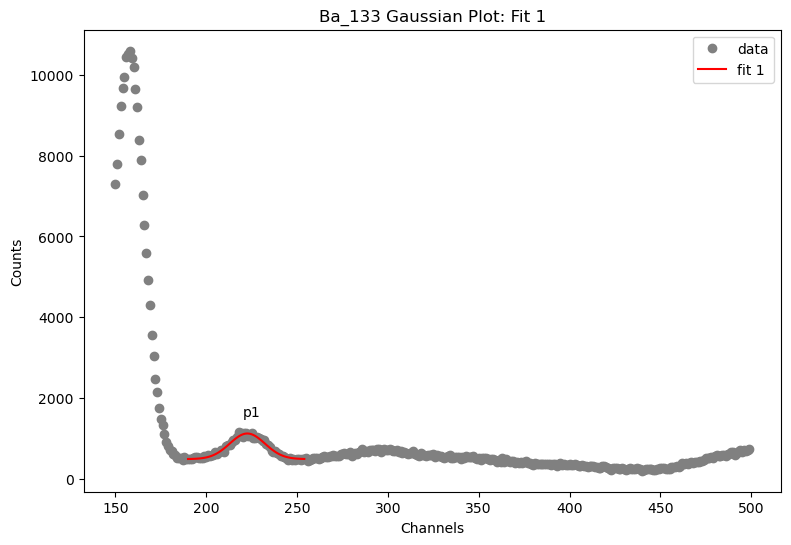

Fit Amplitude 1:  632.9862689049696 ± 12.500169933709982 
 Fit Mean 1:  222.62803942697752 ± 0.18540113976381517 
 Fit Epsilon 1:  93.40052488627991 ± 5.255217294517611 
 Fit C 1:  493.6915034757113 ± 9.388726895497047


In [204]:
# define x and y value ranges
Ba_133_x_slice_1 = Ba_133_x[190:255]
Ba_133_y_slice_1 = Ba_133_y[190:255]

# define popt1 and pcov1, solve for a1, m1, e1, and c1
Ba_133_popt_1, Ba_133_pcov_1 = curve_fit( gaus, Ba_133_x_slice_1, Ba_133_y_slice_1, p0 = [a1:=1750, m1:=215, e1:=800, c1:=50])

#create gaussian with fitted values
Ba_133_y_fit_1= gaus( Ba_133_x_slice_1, *Ba_133_popt_1)

#define x and y value ranges for data to make peak visible in graph
Ba_133_x_slice_data = Ba_133_x[150:500]
Ba_133_y_slice_data = Ba_133_y[150:500]

## plot raw data in range and peak 1 fit curve
plt.figure(figsize=(9,6))
plt.plot(Ba_133_x_slice_data, Ba_133_y_slice_data, color='gray', marker='o', ls='None', label="data")
plt.plot(Ba_133_x_slice_1, Ba_133_y_fit_1, 'r-', label='fit 1')
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.title("Ba_133 Gaussian Plot: Fit 1")
plt.legend()
plt.annotate( 'p1', xy=(215, 1000), xytext=(220, 1550,),
            )
plt.show()

# print actual fit values of gaussian constants & uncertainties (sigma)
sigma = np.sqrt(np.diag(Ba_133_pcov_1))       

print("Fit Amplitude 1: ", Ba_133_popt_1[0], u"\u00B1" , sigma[0],
        "\n Fit Mean 1: ", Ba_133_popt_1[1], u"\u00B1", sigma[1],
        "\n Fit Epsilon 1: ", Ba_133_popt_1[2], u"\u00B1", sigma[2],
        "\n Fit C 1: ", Ba_133_popt_1[3], u"\u00B1", sigma[3])

# Peak 2: 0.276 MeV

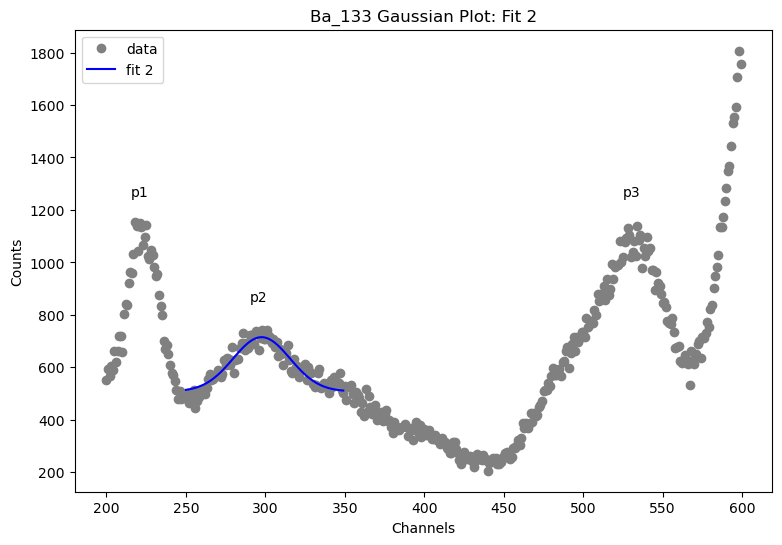

Fit Amplitude 1:  206.831716938764 ± 8.76793472487943 
 Fit Mean 1:  297.6006628324705 ± 0.6032397360614885 
 Fit Epsilon 1:  320.1197644802305 ± 39.850340504656124 
 Fit C 1:  508.2745536964295 ± 8.349006673697799


In [191]:
# define x and y value ranges
Ba_133_x_slice_2 = Ba_133_x[250:350]
Ba_133_y_slice_2 = Ba_133_y[250:350]

# define popt2 and pcov2, solve for a2, m2, e2, and c2
Ba_133_popt_2, Ba_133_pcov_2 = curve_fit( gaus, Ba_133_x_slice_2, Ba_133_y_slice_2, p0 = [a2:=200, m2:=300, e2:=120, c2:=450])

#create gaussian with fitted values
Ba_133_y_fit_2= gaus( Ba_133_x_slice_2, *Ba_133_popt_2)

##define x and y value ranges for data to make peak visible in graph
Ba_133_x_slice_data = Ba_133_x[200:600]
Ba_133_y_slice_data = Ba_133_y[200:600]

## plot fit curve
plt.figure(figsize=(9,6))
plt.plot(Ba_133_x_slice_data, Ba_133_y_slice_data, color='gray', marker='o', ls='None', label="data")
plt.plot(Ba_133_x_slice_2, Ba_133_y_fit_2, 'b-', label='fit 2')
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.title("Ba_133 Gaussian Plot: Fit 2")
plt.legend()
plt.annotate( 'p1', xy=(215, 1250), xytext=(215, 1250,),
            )
plt.annotate('p2', xy=(280, 800), xytext=(290, 850),
            )
plt.annotate('p3', xy=(550, 800), xytext=(525, 1250),
            )
plt.show()

# print actual fit values of gaussian constants & uncertainties (sigma)
sigma = np.sqrt(np.diag(Ba_133_pcov_2))       

print("Fit Amplitude 1: ", Ba_133_popt_2[0], u"\u00B1" , sigma[0],
        "\n Fit Mean 1: ", Ba_133_popt_2[1], u"\u00B1", sigma[1],
        "\n Fit Epsilon 1: ", Ba_133_popt_2[2], u"\u00B1", sigma[2],
        "\n Fit C 1: ", Ba_133_popt_2[3], u"\u00B1", sigma[3])

# Peak 3: 0.303 MeV

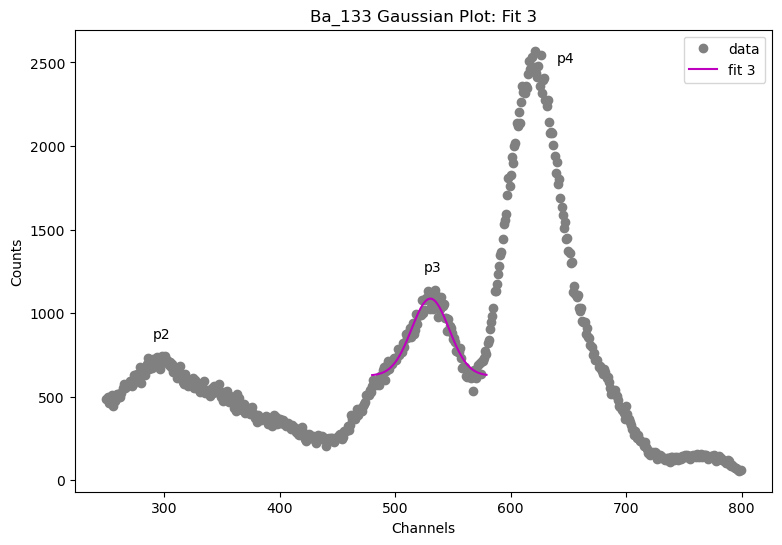

Fit Amplitude 1:  461.1729046257683 ± 14.080765969200977 
 Fit Mean 1:  530.3850014121278 ± 0.44804060611900703 
 Fit Epsilon 1:  263.7022031080031 ± 23.53173589069603 
 Fit C 1:  625.5251852556514 ± 11.932501140564797


In [220]:
# define x and y value ranges
Ba_133_x_slice_3 = Ba_133_x[480:580]
Ba_133_y_slice_3 = Ba_133_y[480:580]

# define popt3 and pcov3, solve for a3, m3, e3, and c3
Ba_133_popt_3, Ba_133_pcov_3 = curve_fit( gaus, Ba_133_x_slice_3, Ba_133_y_slice_3, p0 = [a3:=500, m3:=540, e3:=260, c3:=750])

#create gaussian with fitted values
Ba_133_y_fit_3= gaus( Ba_133_x_slice_3, *Ba_133_popt_3)

##define x and y value ranges for data to make peak visible in graph
Ba_133_x_slice_data = Ba_133_x[250:800]
Ba_133_y_slice_data = Ba_133_y[250:800]

## plot all peaks in fit curve
plt.figure(figsize=(9,6))
plt.plot(Ba_133_x_slice_data, Ba_133_y_slice_data, color='gray', marker='o', ls='None', label="data")
plt.plot(Ba_133_x_slice_3, Ba_133_y_fit_3, 'm-', label='fit 3')
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.title("Ba_133 Gaussian Plot: Fit 3")
plt.legend()
plt.annotate('p2', xy=(280, 800), xytext=(290, 850),
            )
plt.annotate('p3', xy=(550, 800), xytext=(525, 1250),
            )
plt.annotate('p4', xy=(650, 2100), xytext=(640, 2500),
            )
plt.show()

# print actual fit values of gaussian constants & uncertainties (sigma)
sigma = np.sqrt(np.diag(Ba_133_pcov_3))       

print("Fit Amplitude 1: ", Ba_133_popt_3[0], u"\u00B1" , sigma[0],
        "\n Fit Mean 1: ", Ba_133_popt_3[1], u"\u00B1", sigma[1],
        "\n Fit Epsilon 1: ", Ba_133_popt_3[2], u"\u00B1", sigma[2],
        "\n Fit C 1: ", Ba_133_popt_3[3], u"\u00B1", sigma[3])

# Peak 4: 0.356 MeV

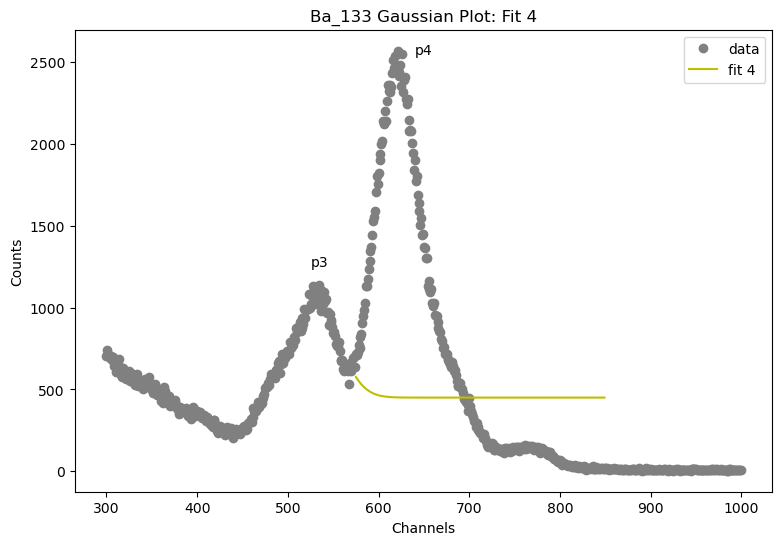

Fit Amplitude 1:  2500.0 ± inf 
 Fit Mean 1:  250.0 ± inf 
 Fit Epsilon 1:  760.0 ± inf 
 Fit C 1:  588.8942184283305 ± inf


In [226]:
# define double gaussian
def n_gaus(x, a1, m1, e1, a2, m2, e2, c):
    fit = (a1*np.exp(( -(x - m1)**2) / (2 * e1) )) + (a2*np.exp(( -(x - m2)**2) / (2 * e2) )) + c2
    return fit

# define x and y value ranges
Ba_133_x_slice_4 = Ba_133_x[575:850]
Ba_133_y_slice_4 = Ba_133_y[575:850]

# define popt4 and pcov4, solve for a3, m3, e3, and c3
Ba_133_popt_4, Ba_133_pcov_4 = curve_fit( n_gaus, Ba_133_x_slice_3, Ba_133_y_slice_3, 
                                         p0 = [a1:=2500, a2:=250, m1:=760, m2:=620, e1:=575, e2:=180, c:=5])

#create gaussian with fitted values
Ba_133_y_fit_4= n_gaus( Ba_133_x_slice_4, *Ba_133_popt_4)

##define x and y value ranges for data to make peak visible in graph
Ba_133_x_slice_data = Ba_133_x[300:1000]
Ba_133_y_slice_data = Ba_133_y[300:1000]

## plot fit curve
plt.figure(figsize=(9,6))
plt.plot(Ba_133_x_slice_data, Ba_133_y_slice_data, color='gray', marker='o', ls='None', label="data")
plt.plot(Ba_133_x_slice_4, Ba_133_y_fit_4, 'y-', label='fit 4')
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.title("Ba_133 Gaussian Plot: Fit 4")
plt.legend()
plt.annotate('p3', xy=(550, 800), xytext=(525, 1250),
            )
plt.annotate('p4', xy=(650, 2100), xytext=(640, 2550),
            )
plt.show()

# print actual fit values of gaussian constants & uncertainties (sigma)
sigma = np.sqrt(np.diag(Ba_133_pcov_4))       

print("Fit Amplitude 1: ", Ba_133_popt_4[0], u"\u00B1" , sigma[0],
        "\n Fit Mean 1: ", Ba_133_popt_4[1], u"\u00B1", sigma[1],
        "\n Fit Epsilon 1: ", Ba_133_popt_4[2], u"\u00B1", sigma[2],
        "\n Fit C 1: ", Ba_133_popt_4[3], u"\u00B1", sigma[3])

# Peak 5: 0.384 MeV

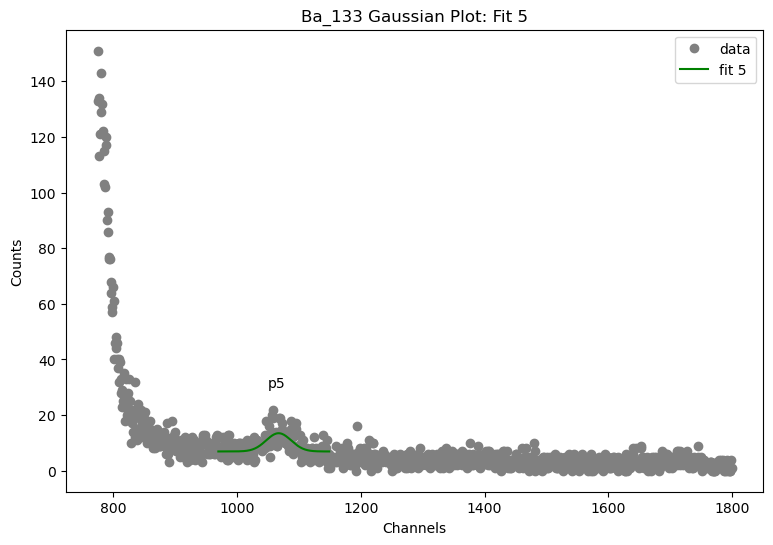

Fit Amplitude 1:  6.559120505460881 ± 0.6642723170715242 
 Fit Mean 1:  1067.3672070052876 ± 2.184795384929625 
 Fit Epsilon 1:  406.0626187625998 ± 107.45761155784433 
 Fit C 1:  6.926109331730201 ± 0.35194649407215295


In [194]:
# define x and y value ranges
Ba_133_x_slice_5 = Ba_133_x[970:1150]
Ba_133_y_slice_5 = Ba_133_y[970:1150]

# define popt5 and pcov5, solve for a5, m5, e5, and c5
Ba_133_popt_5, Ba_133_pcov_5 = curve_fit( gaus, Ba_133_x_slice_5, Ba_133_y_slice_5, p0 = [a5:=35, m5:=1100, e5:=9, c5:=5])

#create gaussian with fitted values
Ba_133_y_fit_5= gaus( Ba_133_x_slice_5, *Ba_133_popt_5)

#define x and y value ranges for data to make peak visible in graph
Ba_133_x_slice_data = Ba_133_x[775:1800]
Ba_133_y_slice_data = Ba_133_y[775:1800]

## plot fit curve
plt.figure(figsize=(9,6))
plt.plot(Ba_133_x_slice_data, Ba_133_y_slice_data, color='gray', marker='o', ls='None', label="data")
plt.plot(Ba_133_x_slice_5, Ba_133_y_fit_5, 'g-', label='fit 5')
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.title("Ba_133 Gaussian Plot: Fit 5")
plt.legend()
plt.annotate('p5', xy=(1050, 30), xytext=(1050, 30),
            )
plt.show()

# print actual fit values of gaussian constants & uncertainties (sigma)
sigma = np.sqrt(np.diag(Ba_133_pcov_5))       

print("Fit Amplitude 1: ", Ba_133_popt_5[0], u"\u00B1" , sigma[0],
        "\n Fit Mean 1: ", Ba_133_popt_5[1], u"\u00B1", sigma[1],
        "\n Fit Epsilon 1: ", Ba_133_popt_5[2], u"\u00B1", sigma[2],
        "\n Fit C 1: ", Ba_133_popt_5[3], u"\u00B1", sigma[3])